In [22]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [23]:
#import the file experiment_dataset from downloads
df = pd.read_csv(R'C:\Users\hanna\Downloads\experiment_dataset.csv')

Initial Analysis:

In [24]:
#take a look at first 15 rows of data set
df.head(15)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


There is no need to keep the Unnanmed: 0 column, so we will drop it to make analysis more clear.

In [25]:
#drop the Unnamed:0 column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [26]:
#look at info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


According to the info, the data set looks clean (no null values), so we can now start analyzing the data. First, we will check the metrics of location, age, and time spent to see if they have any significant bearing on the average time spent by users and the click-through-rate (CTR). 

In [27]:
#group by location
df.groupby('Location')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


In [28]:
#group by age
df.groupby('Age')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Age,,
18,21.805160,0.104431
19,24.301099,0.113928
20,22.658484,0.106769
21,23.174444,0.106317
22,23.339777,0.111566
23,21.203465,0.111024
24,21.505956,0.109765
25,23.541231,0.109907
26,22.598906,0.110061


In [29]:
#group by device 
df.groupby('Device')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


Based on the results above, we can see that users are mostly similar in behaviour regardless of the different factors. This can be validated by performing an ANOVA test to determine the p-values.

In [30]:
#perform ANOVA test for location v.s. time spent
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)


F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [31]:
#perform ANOVA test for location v.s. CTR
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [32]:
#perform ANOVA test for device v.s. time spent
loc_1 = df[df['Device'] == 'Device1']['Time Spent']
loc_2 = df[df['Device'] == 'Device2']['Time Spent']
loc_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [33]:
#perform ANOVA test for device v.s. CTR
loc_1 = df[df['Device'] == 'Device1']['CTR']
loc_2 = df[df['Device'] == 'Device2']['CTR']
loc_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


As seen by the tests above, the p-values are all very high. This confirms that each metric is statistically the same (user behaviour is similar across all factors). A test was not performed for age as there are many values, however we know that it is highly likely that it is not a significant factor in behaviour based on the initial analysis.

We will now start looking at the data based on each variant.

In [34]:
#group by variant
df.groupby('Variant')[['Time Spent','CTR']].mean()

,Time Spent,CTR
Variant,,
Control,20.070781,0.098554
Variant A,24.805547,0.120269
Variant B,23.343783,0.108933


The data above shows that there are not any large differences between the control, variant A, and variant B. However, we can still see that variant A has a higher mean in both time spent and CTR. We will now create a visualization using box plots to see if this remains consistent.

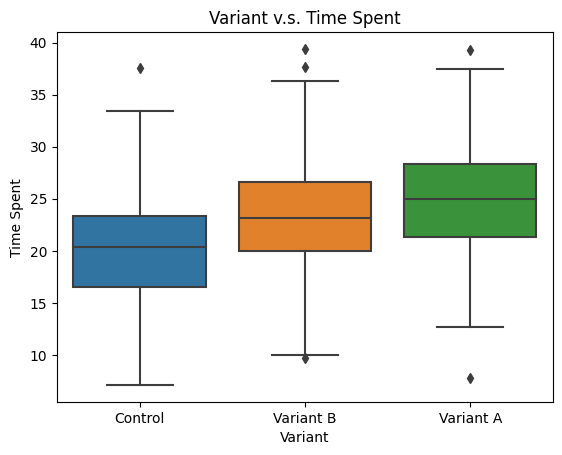

In [35]:
#visualize the data by creating box plot showing the time spent by variant
sns.boxplot(x = df['Variant'], y = df['Time Spent'])
plt.xlabel = ('Variant')
plt.ylabel = ('Time Spent')
plt.title('Variant v.s. Time Spent')
plt.show()

As seen in this box plot, variant A has a higher median time spent when compared to the other groups. There are also some outliers, however we will be keeping these for the purpose of analysis.

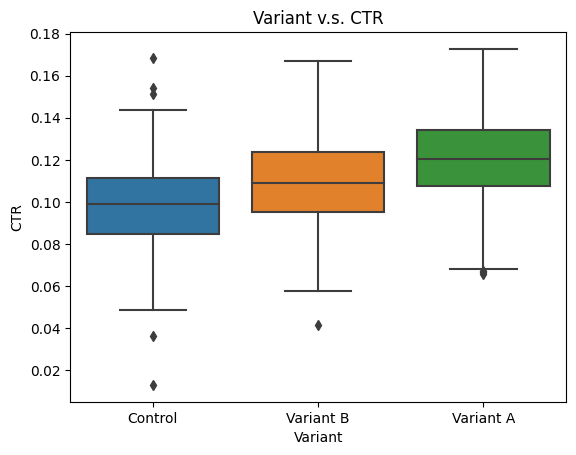

In [36]:
#visualize the data by creating box plot showing the CTR by variant
sns.boxplot(x = df['Variant'], y = df['CTR'])
plt.xlabel = ('Variant')
plt.ylabel = ('CTR')
plt.title('Variant v.s. CTR')
plt.show()

This box plot supports our previous findings that variant A looks to be performing better than the other groups, as it has the highest median CTR. 

Based on this quick analysis and visualization, it appears that both variant A and variant B are outperforming the control. We will now conduct a statistical analysis to confirm if this is true.

Question 1.

In [37]:
#check the lift of time spent by variant
df2 = df.groupby(by = 'Variant')['Time Spent'].sum()
variant_a_lift = df2['Variant A'] - df2['Control']
variant_b_lift = df2['Variant B'] - df2['Control']
print ('Time Spent Lift - Variant A', variant_a_lift)
print ('Time Spent Lift - Variant B', variant_b_lift)

Time Spent Lift - Variant A 1361.7650937699673
Time Spent Lift - Variant B 879.3828393472804


In [38]:
#check the lift of CTR by variant
df2 = df.groupby(by = 'Variant')['CTR'].sum()
variant_a_lift = df2['Variant A'] - df2['Control']
variant_b_lift = df2['Variant B'] - df2['Control']
print ('CTR Lift - Variant A', variant_a_lift)
print ('CTR Lift - Variant B', variant_b_lift)

CTR Lift - Variant A 6.180520716900553
CTR Lift - Variant B 2.439491210528942


Our findings:
- Time spent by variant
    - Variant A has a lift of 1361.77, meaning that users exposed to this feature increased their average time spent by 1361.77% as compared to the control group. This is quite significant.
    - Variant b has a lift of 879.38, meaning that users exposed to this feature increased their average time spent by 879.38% as compared to the control group. While this is still high, it is lower than users exposed to variant A.
    - These findings confirm that although both features resulted in lift, variant A was more successful than variant B in capturing the users' attention, causing them to spend more time looking at the features on the mobile application.
- CTR by variant
    - Variant A has a lift of 6.18, meaning that users exposed to this feature increased their click-through-rate by 6.18% as compared to the control group. This shows that variant A was successful in increasing CTR of users.
    - Variant B has a lift of 2.44, meaning that users exposed to this feature increased their click-through-rate by 2.44% as compared to the control group. This shows that variant B was successful in increasing CTR of users, however was less successful than variant A.
    - These findings confirm that that although both features resulted in lift, users exposed to variant A clicked on more aspects that were included in the feature than users exposed to variant B.

Question 2.

We will now conduct statistical testing to determine if there is actually a statistically significant different between the features and the control group. To do this, we will conduct two-sample t-tests to compare the average time spent and the CTR between variant A and variant B. The t-statistic will allow us to determine the extent of the differences between the features and the control group.
Now, we define our hypotheses:
- Null hypothesis - There is no statistically significant difference between the two features and the control group in terms of average time spent (and CTR respectively).
- Alternate hypothesis - There is a statisically significant difference between the two features and the control group in terms of average time spent (and CTR respectively).

If the p-value is below 0.05, it will indicate that the difference of average time spent and CTR between the features and control group is statistically significant. Therefore, we will reject the null hypothesis and accept our alternate hypothesis.

In [39]:
#import necessary features to perform t-test
from scipy.stats import ttest_ind

#define variables
variant_a = df[df['Variant'] == 'Variant A']
variant_b = df[df['Variant'] == 'Variant B']
control = df[df['Variant'] == 'Control']

#perform t-test for time spent
tstatistic_time_a, pvalue_time_a = ttest_ind(variant_a['Time Spent'], control['Time Spent'])
tstatistic_time_b, pvalue_time_b = ttest_ind(variant_b['Time Spent'], control['Time Spent'])

print('Variant A v.s. Control - Time Spent:')
print('T-statistic:', tstatistic_time_a)
print('P-value:', pvalue_time_a)

print('Variant B v.s. Control - Time Spent:')
print('T-statistic:', tstatistic_time_b)
print('P-value:', pvalue_time_b)

Variant A v.s. Control - Time Spent:
T-statistic: 12.142363487472364
P-value: 8.488565644996449e-31
Variant B v.s. Control - Time Spent:
T-statistic: 8.174237395991806
P-value: 1.496358076285182e-15


Variant A v.s. Control - Time Spent:
- The t-statistic is quite high, which suggests that there is a significant difference in average time spent between variant A and the control group.
- The p-value is very small (below 0.05). As explained above, this means that we reject our null hypothesis and accept the alternate hypothesis. Therefore, we can come to the conclusion that there is a statisically significant difference between variant A and the control group in terms of average time spent.

Variant B v.s. Control - Time Spent:
- The t-statistic is quite high, which suggests that there is a significant difference in average time spent between variant B and the control group.
- The p-value is very small (below 0.05). Therefore, we can come to the conclusion that there is a statisically significant difference between variant B and the control group in terms of average time spent.

In [40]:
#perform t-test for CTR
tstatistic_time_a, pvalue_time_a = ttest_ind(variant_a['CTR'], control['CTR'])
tstatistic_time_b, pvalue_time_b = ttest_ind(variant_b['CTR'], control['CTR'])

print('Variant A v.s. Control - Click-Through-Rate:')
print('T-statistic:', tstatistic_time_a)
print('P-value:', pvalue_time_a)

print('Variant B v.s. Control - Click-Through-Rate:')
print('T-statistic:', tstatistic_time_b)
print('P-value:', pvalue_time_b)

Variant A v.s. Control - Click-Through-Rate:
T-statistic: 13.829424737499187
P-value: 1.9602781373243157e-38
Variant B v.s. Control - Click-Through-Rate:
T-statistic: 6.4718143491783255
P-value: 1.8743198199982106e-10


Variant A v.s. Control - Click-Through-Rate:
- The t-statistic is quite high, which suggests that there is a significant difference in CTR between variant A and the control group.
- The p-value is very small (below 0.05). As explained above, this means that we reject our null hypothesis and accept the alternate hypothesis. Therefore, we can come to the conclusion that there is a statisically significant difference between variant A and the control group in terms of CTR.

Variant B v.s. Control -  Click-Through-Rate:
- The t-statistic is quite high, which suggests that there is a significant difference in CTR between variant B and the control group.
- The p-value is very small (below 0.05). Therefore, we can come to the conclusion that there is a statisically significant difference between variant B and the control group in terms of CTR.

Now, we will conduct another t-test to observe the differences in average time spent and CTR between variant A and variant B. With this test, the null hypothesis is that there is no statistically significant difference between variant A and variant B in terms of average time spent (and CTR respectively). If the p-value is less than 0.05, we will reject this and conclude that there is a meaningful difference between the two features.

In [41]:
#import necessary features to perform t-test
from scipy import stats

#define variables
variant_a_time_spent = df[df['Variant'] == 'Variant A']['Time Spent']
variant_b_time_spent = df[df['Variant'] == 'Variant B']['Time Spent']

variant_a_ctr = df[df['Variant'] == 'Variant A']['CTR']
variant_b_ctr = df[df['Variant'] == 'Variant B']['CTR']

#perform t-test comparing variant A and variant B
t_statistic_time_spent, p_value_time_spent = stats.ttest_ind(variant_a_time_spent, variant_b_time_spent)


t_statistic_ctr, p_value_ctr = stats.ttest_ind(variant_a_ctr, variant_b_ctr)

print("Variant A v.s. Variant B - Time Spent:")
print("T-Statistic:", t_statistic_time_spent)
print("P-Value:", p_value_time_spent)

print("Variant A vs. Variant B - Click-Through-Rate:")
print("T-Statistic:", t_statistic_ctr)
print("P-Value:", p_value_ctr)

Variant A v.s. Variant B - Time Spent:
T-Statistic: 3.6788175394209075
P-Value: 0.0002534771014765265
Variant A vs. Variant B - Click-Through-Rate:
T-Statistic: 7.08499696316128
P-Value: 3.587180487986577e-12


As we can see, the p-values for both average time spent and the CTR are below 0.05, meaning that we reject the null hypothesis. This confirms that there is a meaningful difference between the two features. 

Our findings:

Time spent by variant
- Both variant A and variant B demonstrated that they have succesfully influenced users to spend more time on average looking at different features on the mobile application.
- This means that the features of both variants are more effective than those of the control group, and implementing either of them would result in a rise of average time spent.
- Variant A had a higher t-statistic than variant B, suggesting that the magnitude of difference between that feature and the control group was higher.
- Variant A also had the smallest p-value, meaning that there is very strong evidence in favour of accepting the alternative hypothesis.

CTR by variant
- Both variant A and variant B demonstrated that they have succesfully influenced users to click through more features on the mobile application.
- This means that the features of both variants are more effective than those of the control group, and implementing either of them would result in a rise of the CTR.
- Variant A had a higher t-statistic than variant B, suggesting that the magnitude of difference between that feature and the control group was higher.
- Variant A also had the smallest p-value, meaning that there is very strong evidence in favour of accepting the alternative hypothesis.

In conclusion, there is strong evidence based on the tests conducted that there is a statistically significant difference between the features and the control group.


Question 3.

According to the statistical analysis that has been conducted, we have been able to draw the following conclusions:
- Exposure to both variant A and variant B influenced the behaviour of users. The features caused them to spend more time on average looking through the mobile application and increased their click-through-rate (CTR) when compared to the control group. This is supported through the use of t-tests, in which the resulting p-values were well below the designated threshold of 0.05, meaning that the results are very statistically significant.

- Through these tests, we also observed that variant A appears to influence the behaviours of users more successfully than variant B, meaning that they spent more time on average on the mobile application and had a higher CTR. This was determined due to the fact that in tests comparing both average time spent and CTR, variant A demonstrated higher t-statistics and p-values than variant B. This means that there was a larger magnitude of difference between variant A and the control group, as well as a very statiscially significant result in favour of accepting the alternate hypothesis: that there is a statisically significant difference between the two features and the control group in terms of average time spent (and CTR respectively).

- To confirm that the difference between the 2 variants was also statistically significant, we conducted another t-test to compare variant A and variant B. The results of this test yielded a p-value lower than 0.05, confirming that the difference is meaningful. 

- Therefore, based on solely statistical analysis (and not considering other business factors such as cost, retention rate, etc.) we are recommending to the engineering team that the features of variant A should be deployed to the users of the mobile application. This will result in the highest increase in the metrics of average time spent and CTR and will help to make the mobile app more successful than implementing the features of variant B or keeping them the same, as in the control group.

Question 4.

- As seen in the beginning of the analysis, metrics such as age, device type, and location do not have a significant effect on average time spent or CTR, these do not have to be taken into account when introducing the features of variant A to users of the mobile application.
- Therefore, the company will be able to roll-out variant A relatively quickly, which will be beneifical to the company as there has been strong evidence demonstrated that it is successful in increasing average time spent and click-through-rate.
- However, several factors should be taken into account such as:
    - Would the potential risks be too high if all users are changed to the features of variant A right away? 
    - Can the features of variant A handle a large, immediate increase in users?
    - If every user of the mobile application were transferred to the features of variant A immediately, will it be too difficult to continue monitoring performance and troubleshooting potential issues?


 Due to the points mentioned above, users will be transferred in phases and the recommended roll-out plan is as follows::
- First, users that were exposed to variant B will be changed to the features of variant A. This will be done as soon as possible so that the benefits of the new features can be realized quickly and so those users do not become attached to the features of variant B.
- The company will then continue to monitor the success of the transition and deal with any issues that may occur afterwards.
- Keeping the control group for several more weeks will assist in confirming that variant A provides the most success in terms of average time spent and CTR.
- The features of variant A are still new, so the company can also allow users to offer feedback and report any bugs that may be introduced with the roll-out of variant A in order to ensure the user base has a positive experience using the new features. This will also help minimize the chance that there are any issues with the new features when it is introduced to all users.
- Next, an announcement will be made to the entire user base that the features of variant A will be permanently introduced to all of those using the mobile application. Ensure that the benefits of the new features are clearly explained and shown to users in order to generate excitement. Maintain transparency with the user base and answer any quesitons or concerns that arise.
- After the announcement phase, the users that have remained in the control group will be transitioned to the features of variant A.

- Post roll-out, the company will need to continously monitor and test the success of the new features to ensure they are still contributing to the success of the company. 




